Design and implement a robust pipeline to 
perform emotion classification on speech data 

EDA

In [5]:
!pip install librosa

In [6]:
!pip install tensorflow

  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.18.1 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


Error parsing 03-01-01-01-01-01-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-01-01-01-02-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-01-01-02-01-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-01-01-02-02-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-02-01-01-01-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-02-01-01-02-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-02-01-02-01-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-02-01-02-02-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-02-02-01-01-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-02-02-01-02-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-02-02-02-01-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-02-02-02-02-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-03-01-01-01-01.wav: name 'emotion_map' is not defined
Error parsing 03-01-03-01-01-02-01.wav

C:\Users\Payal\AppData\Local\Temp\ipykernel_18144\3062752800.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion_label', order=df['emotion_label'].value_counts().index, palette='Set2')


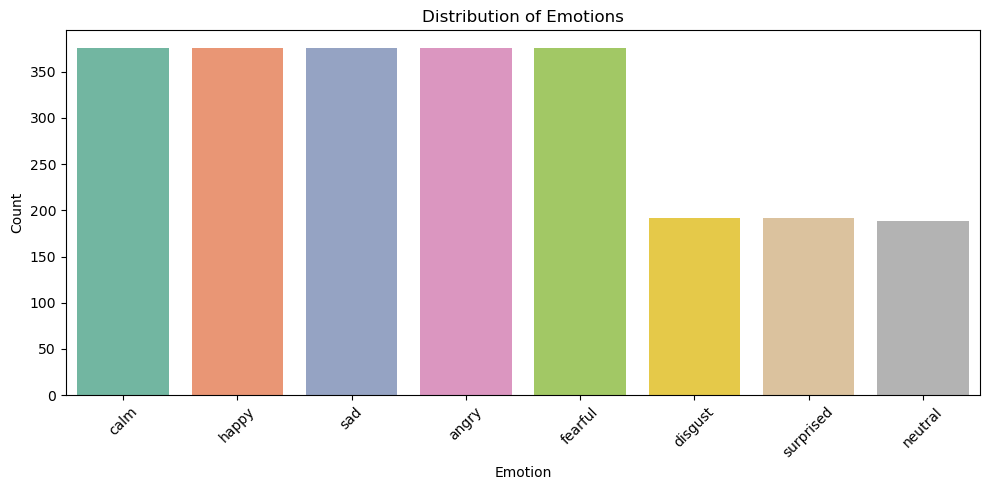

C:\Users\Payal\AppData\Local\Temp\ipykernel_18144\3062752800.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='coolwarm')


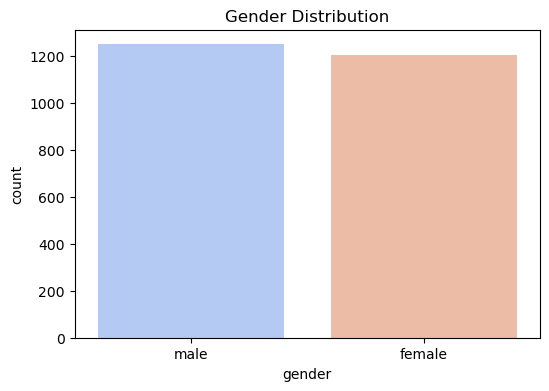

C:\Users\Payal\AppData\Local\Temp\ipykernel_18144\3062752800.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vocal_channel', palette='viridis')


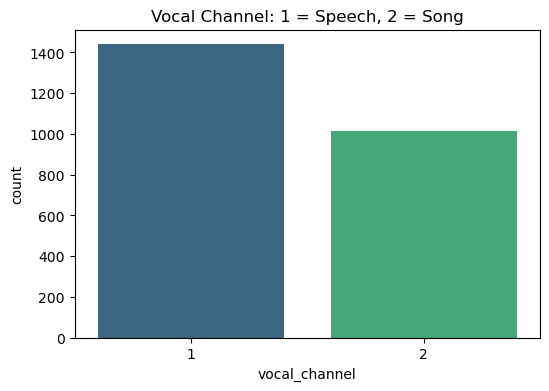

C:\Users\Payal\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\Payal\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\Payal\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


Sample file: C:\Users\Payal\OneDrive\Desktop\MARS\AudioSongActors\Actor_14\03-02-03-01-01-02-14.wav
Duration: 4.24 sec, Sampling Rate: 22050


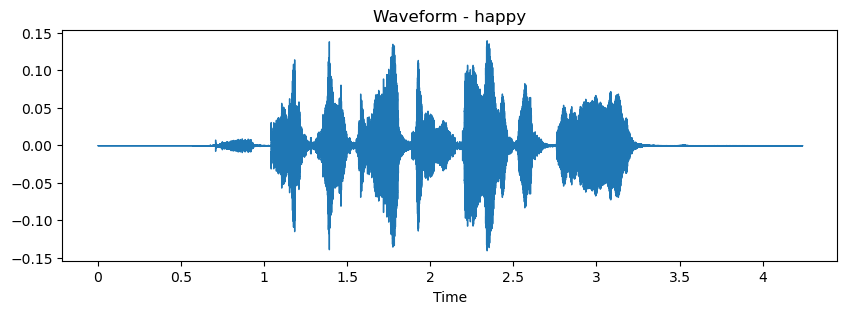

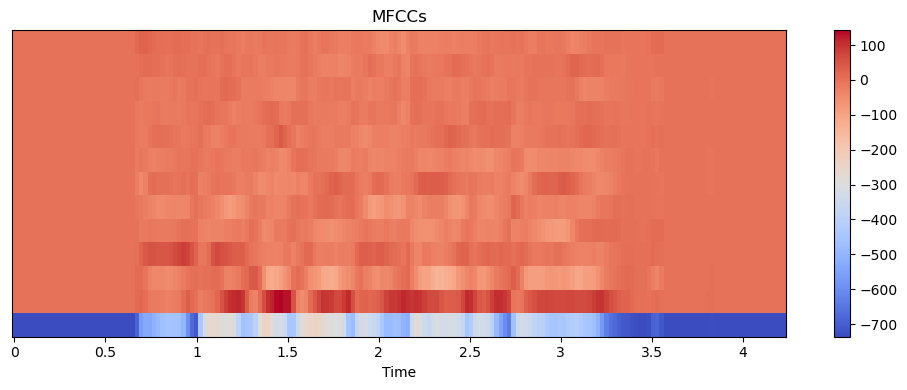

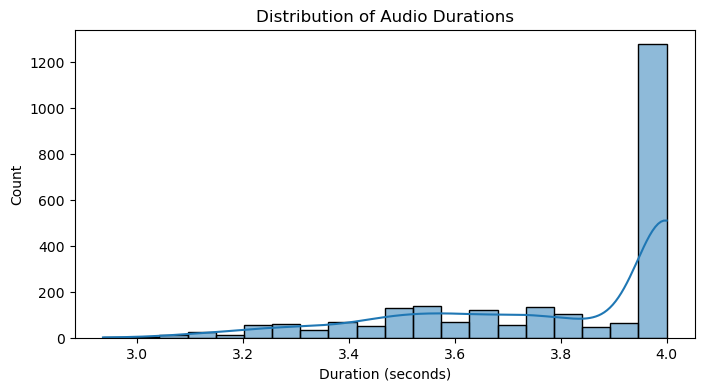

In [7]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

DATASET_PATH = r"C:\Users\Payal\OneDrive\Desktop\MARS"

import glob

DATASET_ROOT = r"C:\Users\Payal\OneDrive\Desktop\MARS"  # or forward slashes

speech_path = os.path.join(DATASET_ROOT, r"C:\Users\Payal\OneDrive\Desktop\MARS\AudioSpeechActors")
song_path = os.path.join(DATASET_ROOT, r"C:\Users\Payal\OneDrive\Desktop\MARS\AudioSongActors")

all_audio_files = glob.glob(speech_path + "/**/*.wav", recursive=True) + \
                  glob.glob(song_path + "/**/*.wav", recursive=True)


def parse_metadata(filename):
    parts = filename.split('-')
    return {
        'modality': int(parts[0]),       
        'vocal_channel': int(parts[1]),  
        'emotion': int(parts[2]),        
        'intensity': int(parts[3]),      
        'statement': int(parts[4]),
        'repetition': int(parts[5]),
        'actor': int(parts[6].split('.')[0])
    }

data = []

for file_path in all_audio_files:
    file = os.path.basename(file_path)
    try:
        meta = parse_metadata(file)
        meta['file_path'] = file_path
        meta['emotion_label'] = emotion_map[meta['emotion']]
        meta['gender'] = 'female' if meta['actor'] % 2 == 0 else 'male'
        data.append(meta)
    except Exception as e:
        print(f"Error parsing {file}: {e}")


emotion_map = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
}


data = []
for root, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith('.wav'):
            meta = parse_metadata(file)
            meta['file_path'] = os.path.join(root, file)
            meta['emotion_label'] = emotion_map[meta['emotion']]
            meta['gender'] = 'female' if meta['actor'] % 2 == 0 else 'male'
            data.append(meta)

df = pd.DataFrame(data)

# Overview of the dataframe
print("Total samples:", len(df))
print(df.head())



# Emotion distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='emotion_label', order=df['emotion_label'].value_counts().index, palette='Set2')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='coolwarm')
plt.title('Gender Distribution')
plt.show()

# Modality distribution (speech vs song)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='vocal_channel', palette='viridis')
plt.title('Vocal Channel: 1 = Speech, 2 = Song')
plt.show()



# Sample waveform and MFCCs
sample_row = df.sample(1).iloc[0]
y, sr = librosa.load(sample_row['file_path'])

# Duration
duration = librosa.get_duration(y=y, sr=sr)
print(f"Sample file: {sample_row['file_path']}")
print(f"Duration: {duration:.2f} sec, Sampling Rate: {sr}")

# Plot waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform - {sample_row['emotion_label']}")
plt.show()

# Plot MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()

# Distribution of durations
durations = []
for i, row in df.iterrows():
    y, sr = librosa.load(row['file_path'], duration=4)  # limit for speed
    durations.append(librosa.get_duration(y=y, sr=sr))
df['duration'] = durations

plt.figure(figsize=(8, 4))
sns.histplot(df['duration'], bins=20, kde=True)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.show()


In [8]:
print(df.columns)
print(df.head())
print("Total rows in df:", len(df))


Index(['modality', 'vocal_channel', 'emotion', 'intensity', 'statement',
       'repetition', 'actor', 'file_path', 'emotion_label', 'gender',
       'duration'],
      dtype='object')
   modality  vocal_channel  emotion  intensity  statement  repetition  actor  \
0         3              2        1          1          1           1      1   
1         3              2        1          1          1           2      1   
2         3              2        1          1          2           1      1   
3         3              2        1          1          2           2      1   
4         3              2        2          1          1           1      1   

                                           file_path emotion_label gender  \
0  C:\Users\Payal\OneDrive\Desktop\MARS\AudioSong...       neutral   male   
1  C:\Users\Payal\OneDrive\Desktop\MARS\AudioSong...       neutral   male   
2  C:\Users\Payal\OneDrive\Desktop\MARS\AudioSong...       neutral   male   
3  C:\Users\Payal\OneDrive

Sample rows:
   modality  vocal_channel  emotion  intensity  statement  repetition  actor  \
0         3              2        1          1          1           1      1   
1         3              2        1          1          1           2      1   
2         3              2        1          1          2           1      1   
3         3              2        1          1          2           2      1   
4         3              2        2          1          1           1      1   

                                           file_path emotion_label gender  \
0  C:\Users\Payal\OneDrive\Desktop\MARS\AudioSong...       neutral   male   
1  C:\Users\Payal\OneDrive\Desktop\MARS\AudioSong...       neutral   male   
2  C:\Users\Payal\OneDrive\Desktop\MARS\AudioSong...       neutral   male   
3  C:\Users\Payal\OneDrive\Desktop\MARS\AudioSong...       neutral   male   
4  C:\Users\Payal\OneDrive\Desktop\MARS\AudioSong...          calm   male   

   duration  
0       4.0  
1       4.0  
2

C:\Users\Payal\AppData\Local\Temp\ipykernel_18144\3546257680.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')


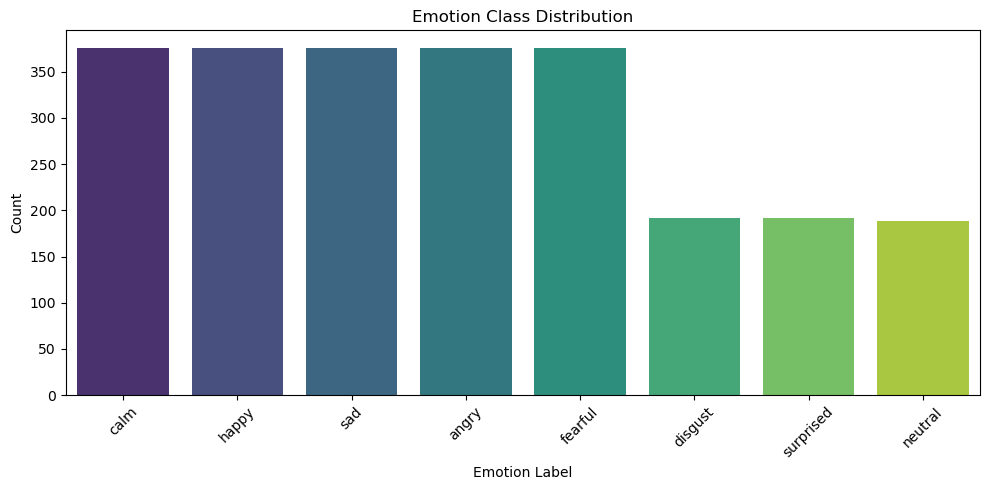


Class distribution (%):
emotion_label
calm         15.33
happy        15.33
sad          15.33
angry        15.33
fearful      15.33
disgust       7.83
surprised     7.83
neutral       7.67
Name: count, dtype: float64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


print("Sample rows:")
print(df.head())


print("\nEmotion class distribution:")
emotion_counts = df['emotion_label'].value_counts()
print(emotion_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.title("Emotion Class Distribution")
plt.ylabel("Count")
plt.xlabel("Emotion Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nClass distribution (%):")
print((emotion_counts / len(df) * 100).round(2))


Audio classification and data pre processing


✅ Dataset Loaded
  emotion_label gender  vocal_channel
0       neutral   male              1
1       neutral   male              1
2       neutral   male              1
3       neutral   male              1
4          calm   male              1
Features shape: (2452, 187)

📊 Plotting Sample File:


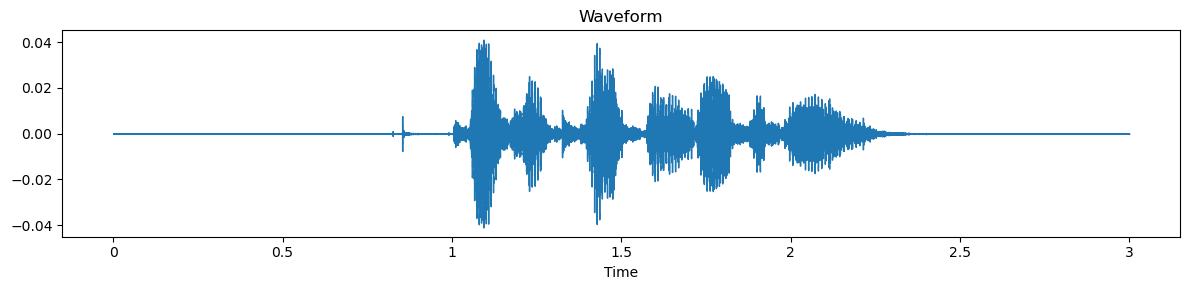

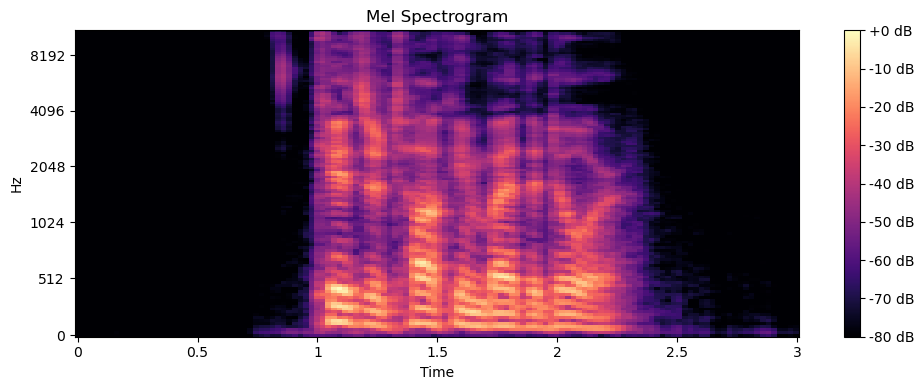

In [11]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


SAMPLE_RATE = 22050
MAX_DURATION = 3  # seconds
MAX_LENGTH = SAMPLE_RATE * MAX_DURATION

emotion_map = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
}


def parse_metadata(filename):
    parts = filename.split('-')
    return {
        'modality': int(parts[0]),
        'vocal_channel': int(parts[1]),
        'emotion': int(parts[2]),
        'intensity': int(parts[3]),
        'statement': int(parts[4]),
        'repetition': int(parts[5]),
        'actor': int(parts[6].split('.')[0])
    }

# ========== FUNCTION: Feature Extraction ==========
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=MAX_DURATION)
    if len(y) < MAX_LENGTH:
        y = np.pad(y, (0, MAX_LENGTH - len(y)))
    else:
        y = y[:MAX_LENGTH]

    # Feature extraction
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
    contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)

    return np.concatenate((mfcc, chroma, mel, contrast))


def load_dataset(dataset_paths):
    rows = []
    features = []

    for path in dataset_paths:
        for root, _, files in os.walk(path):
            for file in files:
                if file.endswith('.wav'):
                    try:
                        meta = parse_metadata(file)
                        meta['file_path'] = os.path.join(root, file)
                        meta['emotion_label'] = emotion_map[meta['emotion']]
                        meta['gender'] = 'female' if meta['actor'] % 2 == 0 else 'male'
                        feat = extract_features(meta['file_path'])
                        features.append(feat)
                        rows.append(meta)
                    except Exception as e:
                        print(f"Skipping {file}: {e}")
    return pd.DataFrame(rows), np.array(features)


def plot_waveform_and_mel(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=MAX_DURATION)
    y = y[:MAX_LENGTH]

    plt.figure(figsize=(12, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title("Waveform")
    plt.tight_layout()
    plt.show()

    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Mel Spectrogram")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Set your paths here
    speech_path = r"C:\Users\Payal\OneDrive\Desktop\MARS\AudioSpeechActors"
    song_path = r"C:\Users\Payal\OneDrive\Desktop\MARS\AudioSongActors"

    df, features = load_dataset([speech_path, song_path])

    print("\n✅ Dataset Loaded")
    print(df[['emotion_label', 'gender', 'vocal_channel']].head())
    print(f"Features shape: {features.shape}")
    
    np.save("features.npy", features)
    df.to_csv("labels.csv", index=False)

    
    print("\n📊 Plotting Sample File:")
    plot_waveform_and_mel(df.iloc[0]['file_path'])


In [12]:
X = np.load("features.npy")
labels_df = pd.read_csv("labels.csv")

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels_df['emotion_label'])  # or your target column


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


features = np.load("features.npy")
labels_df = pd.read_csv("labels.csv")


le = LabelEncoder()
labels_encoded = le.fit_transform(labels_df['emotion_label'])


X_train, X_test, y_train, y_test = train_test_split(
    features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print("Classes:", le.classes_)


Train shape: (1961, 187), Test shape: (491, 187)
Classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [14]:
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)


label_map = {i: label for i, label in enumerate(le.classes_)}
print("Label mapping:", label_map)


Label mapping: {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}


In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_upgraded_model(input_shape=(128, 128, 1), num_classes=8):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Block 3
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.4)(x)

    # Dense Layers
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Optimizer and Compilation
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Instantiate and summarize
model = build_upgraded_model()
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,516,360 (32.49 MB)

 Trainable params: 8,515,912 (32.49 MB)

 Non-trainable params: 448 (1.75 KB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │          48,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,824 (354.78 KB)

 Trainable params: 90,312 (352.78 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1820 - loss: 2.1920 - val_accuracy: 0.1711 - val_loss: 2.6920
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3045 - loss: 1.7770 - val_accuracy: 0.2505 - val_loss: 2.4012
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3730 - loss: 1.6576 - val_accuracy: 0.3605 - val_loss: 1.7005
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3986 - loss: 1.5352 - val_accuracy: 0.4216 - val_loss: 1.5777
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4453 - loss: 1.4629 - val_accuracy: 0.5153 - val_loss: 1.2488
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4706 - loss: 1.3868 - val_accuracy: 0.5132 - val_loss: 1.2498
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4706 - loss: 1.3695 - val_accuracy: 0.4888 - val_loss: 1.3128
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5064 - loss: 1.2895 - val_accuracy: 0.4827 - val_loss:

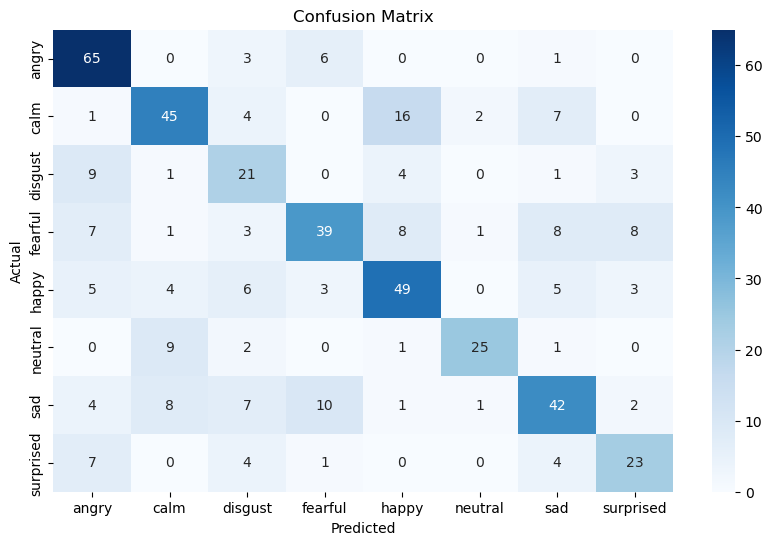


Classification Report:

              precision    recall  f1-score   support

       angry       0.66      0.87      0.75        75
        calm       0.66      0.60      0.63        75
     disgust       0.42      0.54      0.47        39
     fearful       0.66      0.52      0.58        75
       happy       0.62      0.65      0.64        75
     neutral       0.86      0.66      0.75        38
         sad       0.61      0.56      0.58        75
   surprised       0.59      0.59      0.59        39

    accuracy                           0.63       491
   macro avg       0.64      0.62      0.62       491
weighted avg       0.64      0.63      0.63       491



In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X_train = np.load("features.npy")
labels_df = pd.read_csv("labels.csv")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(labels_df['emotion_label'])
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y, test_size=0.2, stratify=y, random_state=42
)

# One-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


input_dim = X_train.shape[1]
num_classes = y_train_cat.shape[1]

# ========== Model Creation ==========
model = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ========== Model Training ==========
history = model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test_cat)
)

# ========== Evaluation ==========
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\n✅ Test Accuracy: {test_acc:.2f}")

# ========== Confusion Matrix ==========
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ========== F1 Score and Detailed Report ==========
from sklearn.metrics import classification_report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=le.classes_))


80/20 Train-Validation Split & Accuracy/Loss Plot

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6922 - loss: 0.8449 - val_accuracy: 0.6375 - val_loss: 0.9737
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6632 - loss: 0.8658 - val_accuracy: 0.6334 - val_loss: 0.9692
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6658 - loss: 0.8757 - val_accuracy: 0.6232 - val_loss: 1.0185
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6943 - loss: 0.8496 - val_accuracy: 0.6456 - val_loss: 0.9633
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6868 - loss: 0.8330 - val_accuracy: 0.6008 - val_loss: 1.0058
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6932 - loss: 0.8213 - val_accuracy: 0.6130 - val_loss: 1.0193
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6837 - loss: 0.8470 - val_accuracy: 0.6232 - val_loss: 0.9885
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7013 - loss: 0.7966 - val_accuracy: 0.6354 - val_loss:

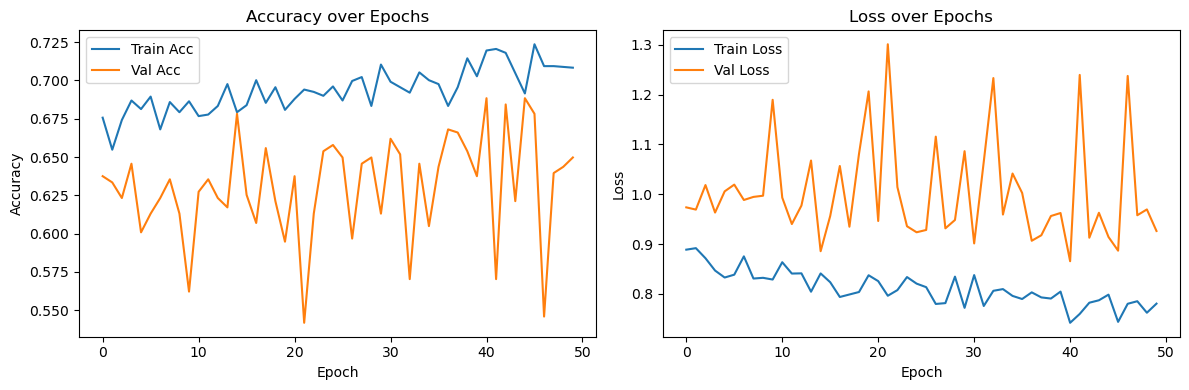

In [18]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)


history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=50, batch_size=32)


plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


Convert audio to Mel Spectrograms (image-like input)

In [20]:
def audio_to_melspec(filepath, max_len=128):
    y, sr = librosa.load(filepath, sr=22050)
    y = librosa.util.fix_length(y, size=sr*3)  # force 3 sec
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db[:, :max_len]  # trim or pad


X = []
y = []
for _, row in df.iterrows():
    try:
        melspec = audio_to_melspec(row['file_path'])  
        X.append(melspec)
        y.append(row['emotion_label'])
    except Exception as e:
        print("Skipped:", row['file_path'])

X = np.array(X)
X = X[..., np.newaxis]  


Encode Labels

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)


CNN Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,096 (12.61 MB)

 Trainable params: 3,305,096 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.save("emotion_model.h5")


In [26]:
import os
assert os.path.exists("emotion_model.h5"), "Model file not found!"


Streamlit App for Emotion Prediction from Audio File

In [28]:
import streamlit as st
import librosa
import numpy as np
from tensorflow.keras.models import load_model
import librosa.display
import matplotlib.pyplot as plt


model = load_model("emotion_model.h5")
labels = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']  # match your encoder

st.title("🎵 Speech Emotion Recognition")
uploaded_file = st.file_uploader("Upload a .wav audio file", type=["wav"])

def extract_mel_spec(file):
    y, sr = librosa.load(file, duration=3, sr=22050)
    y = librosa.util.fix_length(y, sr * 3)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_db = mel_db[:, :128]
    return mel_db[np.newaxis, ..., np.newaxis]  # shape: (1, 128, 128, 1)

if uploaded_file is not None:
    st.audio(uploaded_file)
    features = extract_mel_spec(uploaded_file)
    prediction = model.predict(features)
    emotion = labels[np.argmax(prediction)]
    st.success(f"Predicted Emotion: **{emotion.upper()}**")


2025-06-24 00:19:20.641 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 00:19:20.801 
  command:

    streamlit run C:\Users\Payal\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-24 00:19:20.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 00:19:20.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 00:19:20.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 00:19:20.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 00:19:20.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 00:19:20.808 Thread 'MainThread': mi